In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error  #importing basic things
from math import sqrt

In [2]:
from statsmodels.graphics.tsaplots import plot_acf  #autocorrelation function plot autocorrelation is basically our signal and our signal with a time lag and ur place these signals on top of one another
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA #arima model

In [3]:


df = pd.read_csv('Groceries_1_dataset3.csv', parse_dates=True, index_col=[0])
df.head()


,Demand
Date,
2019-01-07,10000
2019-02-07,14000
2019-03-07,10000
2019-04-07,8000
2019-05-07,8000


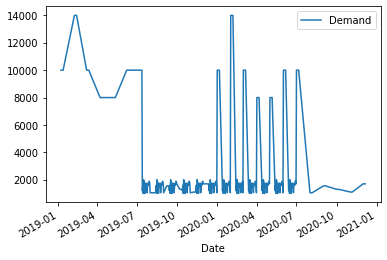

In [4]:
df.plot()
plt.show()

In [5]:
demand_diff = df.diff(periods=30)
demand_diff = demand_diff[30:]
demand_diff.head()

,Demand
Date,
2019-07-31,-8950.0
2019-01-08,-4000.0
2019-02-08,4000.0
2019-03-08,2000.0
2019-04-08,0.0


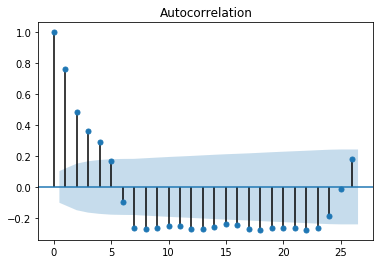

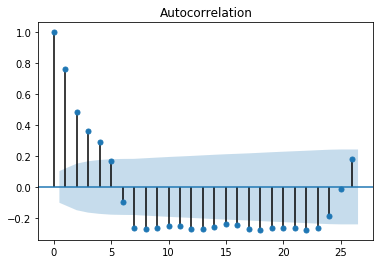

In [6]:
plot_acf(df.values)

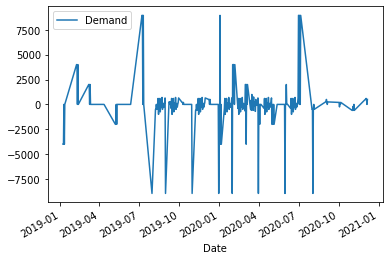

In [7]:
demand_diff.plot()

In [8]:
X = df.values
train1 = X[0:336]
test1 = X[336:]
X.shape

(366, 1)

In [9]:
model_arima = ARIMA(train1,order=(25,1,1))

In [10]:
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

5895.773866770829


C:\Users\Aditi\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


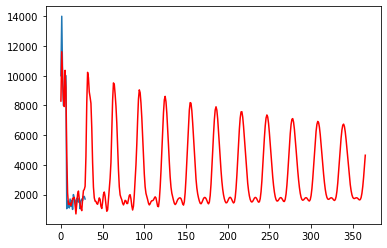

In [21]:
y_pred1 = model_arima_fit.forecast(steps=366)[0].tolist()
plt.plot(test1)
plt.plot(y_pred1 , color = 'red')

In [22]:
y_pred1

[8293.783865148047,
 11610.4674084055,
 10000.232798506826,
 8406.789807542378,
 7923.9382630733835,
 10360.776243280561,
 9204.913748912115,
 4662.463272403011,
 2117.217444679005,
 1344.2464716858797,
 1340.7341977782971,
 1429.402041928945,
 1257.1802152051403,
 1444.3144638015092,
 1738.602565356312,
 1746.6630058613255,
 1812.9294629519377,
 1296.9310683453878,
 698.6193346895657,
 1382.0636914236516,
 2018.9945414178683,
 2235.906431944587,
 1708.764651238309,
 1402.6901014560442,
 1078.1410129746114,
 918.7479781776117,
 1674.4219311999418,
 2266.408590933167,
 2340.6505755638445,
 2556.8232905467507,
 4562.012463190467,
 8173.852505315552,
 10225.32732402311,
 9866.901566017226,
 8911.30069374321,
 8553.194668145627,
 8143.395385789187,
 6489.172718265159,
 4154.14501537811,
 2506.1763852253644,
 1783.9416261592023,
 1556.3023700902472,
 1544.3544104371906,
 1395.4839962252097,
 1346.7739094538438,
 1547.0098706050667,
 1777.6909446637528,
 1673.889242791946,
 1205.633764761653

In [12]:
from sklearn.metrics import r2_score
acc = r2_score(test1, y_pred1)
print(acc)  #94% accurate

0.9350085714467697


In [13]:
import pickle

In [14]:
filename='model_groceries.pkl'
pickle.dump(model_arima_fit, open(filename, 'wb'))

In [20]:
model = pickle.load(open(filename, 'rb'))